In [1]:
from analysis_utils import *
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib as mpl
import numpy as np
%matplotlib inline
%load_ext autoreload
%autoreload

path = "/Users/Akshay/Documents/TranslationDynamics/data/"
data = "190515_1927/"
collisions = []
for i in range(1,13):
    sim_i = countIncorrectRepeatCollisions(path+data, 100*(i-1),100*i)
    collisions.append(sim_i)
    print(sim_i)

test
(13.630993268306087, 41.9104574900854)
test
(8.570675678869378, 28.026631837094236)
test
(7.2191969488293255, 24.504593165394027)
test
(5.562296369166344, 17.950286351841356)
test
(4.207293402485224, 13.276775079345006)
test
missing expt
502
(2.8705672776947075, 9.69657057287664)
test
missing expt
651
missing expt
652
missing expt
653
missing expt
654
missing expt
655
missing expt
656
missing expt
657
missing expt
658
missing expt
659
missing expt
660
missing expt
661
missing expt
667
missing expt
668
missing expt
669
missing expt
670
missing expt
671
missing expt
672
missing expt
673
missing expt
674
missing expt
675
missing expt
676
missing expt
677
(9.755825087775296, 28.669998009933835)
test
(4.489985011581959, 14.36449581925812)
test
(3.872708990356049, 11.535414749102063)
test
(3.141534705503374, 9.186428361730579)
test
(2.5860762870098695, 6.749538837712371)
test
missing expt
1107
missing expt
1199
(1.6512451040281722, 4.518899028519271)


In [2]:
expt_start=1000
expt_end=1001
df_outputs = pd.read_csv(path+data+"outputReactionsList.txt",sep=" ",header=None) #Add batch processing here potentially
rxn14_tot = list()
print("test")
for expt_num, row in df_outputs.iterrows():
    rxn14_count = 0
    if(expt_num>=expt_start and expt_num<expt_end):
        try:
            my_cols=["time","rxn","x","y","z","reactantA","reactantB","productA","productB"]
            
            df = pd.read_csv(path+data+row[0],delimiter=" ",header=None, names=my_cols)
            df=df[['time','reactantA','reactantB']]
            df=df.sort_values(['reactantA', 'time'])
            print(df)
            reactantA = '-1'
            reactantB = '-1'
            repeat=0
            for _, row in df.iterrows():
                if(row["reactantA"]==reactantA and row["reactantB"]==reactantB):
                    repeat+=1
                else:
                    rxn14_tot.append(repeat)
                    repeat=0
                    reactantA = row["reactantA"]
                    reactantB= row["reactantB"]
        except:
            print("missing expt")
            print(expt_num)

test
              time  reactantA  reactantB
1     2.200000e-09          1         40
4     3.000000e-09          1         44
11    5.700000e-09          1         19
26    1.310000e-08          1         19
30    1.410000e-08          1         19
...            ...        ...        ...
1378  2.744000e-07       1140         11
1389  2.778000e-07       1140         41
1421  2.869000e-07       1140         17
1430  2.918000e-07       1140         17
1444  2.975000e-07       1140         11

[1450 rows x 3 columns]


In [3]:
from analysis_utils import *
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib as mpl
import numpy as np
%matplotlib inline
%load_ext autoreload
%autoreload

path = "/Users/Akshay/Documents/TranslationDynamics/data/"
data = "190516_0358/"
collisions = []
for i in range(1,13):
    sim_i = countIncorrectRepeatCollisions(path+data, 100*(i-1),100*i,ts_equillibrate=1e-7)
    collisions.append(sim_i[0])
    print(sim_i)
for i in range(1,13):
    sim_i = countIncorrectRepeatCollisions(path+data, 100*(i-1),100*i,equalRibosomes=True,ts_equillibrate=1e-7)
    collisions.append(sim_i[0])
    print(sim_i)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
test
(10.622208811104406, 18.24991634004603)
test
(7.876129339039467, 14.301675192469538)
test
(6.9874145431945305, 13.941249923777564)
test
(5.317821485195184, 10.97233588910208)
test
(3.9675166093327383, 8.212125595879135)
test
(3.078997253278657, 6.979420979697253)
test
(7.097882083571838, 13.738215268575388)
test
(3.5667231775248243, 7.9544121862961505)
test
(3.283757170990667, 8.113395062780974)
test
(2.4330872173511766, 6.125619211762253)
test
(1.912853941739662, 4.914376225766993)
test
(1.3209466638334042, 3.108700592823437)
test
(10.622208811104406, 18.24991634004603)
test
(7.801724137931035, 13.755461281981303)
test
(6.917514124293786, 13.778322114784684)
test
(5.149203852958522, 11.062431214119833)
test
(3.9731429180432696, 8.295352780881739)
test
(3.0909657968603805, 7.457272719159218)
test
(7.097882083571838, 13.738215268575388)
test
(3.4861146496815287, 7.596453970737309)
test
(3.078621

In [5]:
phi_tot = np.array([0.13172292, 0.22350473, 0.30181037, 0.35583449, 0.3945994 ,
       0.42317604])
phi_crowder = np.array([0.06434998409146828, 0.08752983986220698, 0.10039264723107891, 0.10253311875190417, 0.09787505368673736, 0.08864402690993489])
dbl = [0.6,1.0,1.5,2.0,2.5,3.0]

fig,ax = plt.subplots(1,1,figsize=(10,10))
ax.plot(phi_tot-phi_crowder,collisions[0:6],label='No crowders, all ribosomes',linewidth=4)
ax.plot(phi_tot-phi_crowder,collisions[6:12],label='Crowders, all ribosomes',linewidth=4)
ax.plot(phi_tot,collisions[12:18],label='No crowders, equal active ribosomes',linewidth=4)
ax.plot(phi_tot,collisions[18:24],label='Crowders, equal active ribosomes',linewidth=4)
ax.legend(prop={'size': 6})
ax.spines['left'].set_linewidth(4)
ax.spines['bottom'].set_linewidth(4)
ax.spines['top'].set_linewidth(4)
ax.spines['right'].set_linewidth(4)
ax.set_xlabel('$\phi_{tot}$',size=55color='black')
ax.set_ylabel("Average # of repeat collisions",fontsize=40)
ax.tick_params(axis='both', which='major', labelsize=25)

collisions[6:12]


SyntaxError: invalid syntax (<ipython-input-5-8a20060485a2>, line 16)

In [6]:
phi_tot = np.array([0.13172292, 0.22350473, 0.30181037, 0.35583449, 0.3945994 ,
       0.42317604])
phi_crowder = np.array([0.06434998409146828, 0.08752983986220698, 0.10039264723107891, 0.10253311875190417, 0.09787505368673736, 0.08864402690993489])
dbl = [0.6,1.0,1.5,2.0,2.5,3.0]

fig,ax = plt.subplots(1,1,figsize=(10,10))
ax.plot(dbl,collisions[6:12],label='Crowders, all ribosomes',linewidth=4)
ax.plot(dbl,collisions[0:6],label='No crowders, all ribosomes',linewidth=4, linestyle='--')
ax.plot(dbl,collisions[18:24],label='Crowders, equal active ribosomes',linewidth=4)
ax.plot(dbl,collisions[12:18],label='No crowders, equal active ribosomes',linewidth=4,linestyle='--'))
ax.legend()
ax.spines['left'].set_linewidth(4)
ax.spines['bottom'].set_linewidth(4)
ax.spines['top'].set_linewidth(4)
ax.spines['right'].set_linewidth(4)
ax.set_xlabel('Doubling rate',size=45,color='black')
ax.set_ylabel("Average # of repeat collisions",fontsize=25)
ax.tick_params(axis='both', which='major', labelsize=15)


SyntaxError: invalid syntax (<ipython-input-6-ae9596327810>, line 10)

In [2]:
from analysis_utils import *
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib as mpl
import numpy as np
%matplotlib inline
%load_ext autoreload
%autoreload


#####Extra 9 overlap resolving steps for every diffusion step#######
### From ribosome view ###
path = "/Users/Akshay/Documents/TranslationDynamics/data/"
data = "190529_1527/"
collisions = []
for i in range(1,13):
    sim_i = countIncorrectRepeatCollisions(path+data, 100*(i-1),100*i,ts_equillibrate=1e-7)
    collisions.append(sim_i[0])
    print(sim_i)
for i in range(1,13):
    sim_i = countIncorrectRepeatCollisions(path+data, 100*(i-1),100*i,equalRibosomes=True,ts_equillibrate=1e-7)
    collisions.append(sim_i[0])
    print(sim_i)
    
phi_tot = np.array([0.13172292, 0.22350473, 0.30181037, 0.35583449, 0.3945994 ,
   0.42317604])
phi_crowder = np.array([0.06434998409146828, 0.08752983986220698, 0.10039264723107891, 0.10253311875190417, 0.09787505368673736, 0.08864402690993489])
dbl = [0.6,1.0,1.5,2.0,2.5,3.0]

fig,ax = plt.subplots(1,1,figsize=(10,10))
ax.plot(dbl,collisions[0:6],label='No crowders, all ribosomes',linewidth=4)
ax.plot(dbl,collisions[6:12],label='Crowders, all ribosomes',linewidth=4)
ax.plot(dbl,collisions[12:18],label='No crowders, equal active ribosomes',linewidth=4)
ax.plot(dbl,collisions[18:24],label='Crowders, equal active ribosomes',linewidth=4)
ax.legend()
ax.spines['left'].set_linewidth(4)
ax.spines['bottom'].set_linewidth(4)
ax.spines['top'].set_linewidth(4)
ax.spines['right'].set_linewidth(4)
ax.set_xlabel('Doubling rate',size=45,color='black')
ax.set_ylabel("Average # of repeat collisions",fontsize=25)
ax.tick_params(axis='both', which='major', labelsize=15)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


FileNotFoundError: [Errno 2] File b'/Users/Akshay/Dropbox/Life/EndyLab/Research/TranslationDynamics/data/190529_1527/outputReactionsList.txt' does not exist: b'/Users/Akshay/Dropbox/Life/EndyLab/Research/TranslationDynamics/data/190529_1527/outputReactionsList.txt'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
test
(1.7106969205834683, 2.859162926861741)
test
(1.5312438785504408, 2.678285979635353)
test
missing expt
237
(3.367508288701862, 47.091586847193675)
test
(2.3286872206651013, 27.65457117516052)
test
(3.379380826561643, 31.971364524435113)
test
(2.1683198076345054, 24.183981593343166)
test
(2.208855472013367, 3.746988334731698)
test
(1.7030102261270343, 3.655470806000324)
test
(1.55718820861678, 3.480274089793463)
test
(1.1507453190329031, 3.000068000325853)
test
(0.8553775743707094, 2.256371534224404)
test
(0.8172586242090223, 3.914923759555986)
test
(1.7106969205834683, 2.859162926861741)
test
(1.5515840779853778, 2.7463104872690742)
test
missing expt
237
(4.338483146067416, 45.119065727042454)
test
(2.9551848217206413, 33.33206831253776)
test
(3.338952071486596, 29.435151875275412)
test
(2.3551528878822197, 29.305932877760732)
test
(2.208855472013367, 3.746988334731698)
test
(1.6549672813801308

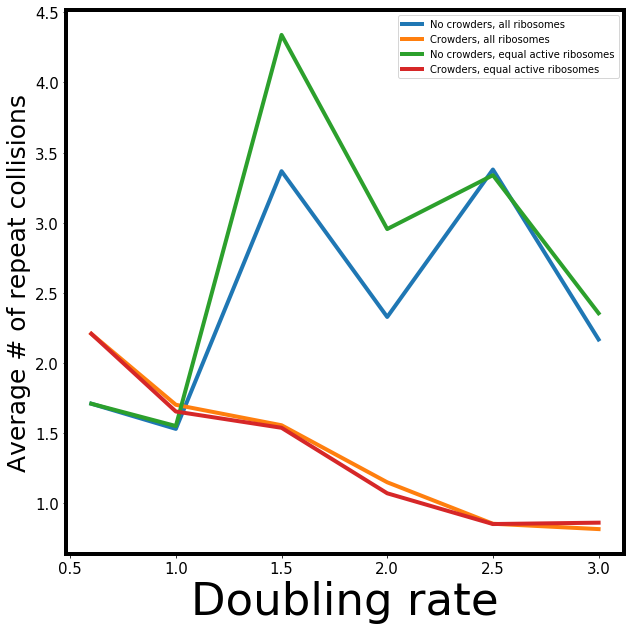

In [8]:
from analysis_utils import *
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib as mpl
import numpy as np
%matplotlib inline
%load_ext autoreload
%autoreload

#####Extra 9 overlap resolving steps for every diffusion step#######
####Particles are moved an extra 5 angstroms after every collision####
### From ribosome view ###

path = "/Users/Akshay/Documents/TranslationDynamics/data/"
data = "190530_0934/"
collisions = []
for i in range(1,13):
    sim_i = countIncorrectRepeatCollisions(path+data, 100*(i-1),100*i,ts_equillibrate=1e-7)
    collisions.append(sim_i[0])
    print(sim_i)
for i in range(1,13):
    sim_i = countIncorrectRepeatCollisions(path+data, 100*(i-1),100*i,equalRibosomes=True,ts_equillibrate=1e-7)
    collisions.append(sim_i[0])
    print(sim_i)

phi_tot = np.array([0.13172292, 0.22350473, 0.30181037, 0.35583449, 0.3945994 ,
   0.42317604])
phi_crowder = np.array([0.06434998409146828, 0.08752983986220698, 0.10039264723107891, 0.10253311875190417, 0.09787505368673736, 0.08864402690993489])
dbl = [0.6,1.0,1.5,2.0,2.5,3.0]

fig,ax = plt.subplots(1,1,figsize=(10,10))
ax.plot(dbl,collisions[0:6],label='No crowders, all ribosomes',linewidth=4)
ax.plot(dbl,collisions[6:12],label='Crowders, all ribosomes',linewidth=4)
ax.plot(dbl,collisions[12:18],label='No crowders, equal active ribosomes',linewidth=4)
ax.plot(dbl,collisions[18:24],label='Crowders, equal active ribosomes',linewidth=4)
ax.legend()
ax.spines['left'].set_linewidth(4)
ax.spines['bottom'].set_linewidth(4)
ax.spines['top'].set_linewidth(4)
ax.spines['right'].set_linewidth(4)
ax.set_xlabel('Doubling rate',size=45,color='black')
ax.set_ylabel("Average # of repeat collisions",fontsize=25)
ax.tick_params(axis='both', which='major', labelsize=15)

In [7]:
path = "/Users/Akshay/Documents/TranslationDynamics/data/"
data = "190814_0330/"
collisions = []
for i in range(1,13):
    sim_i = countIncorrectRepeatReactions(path+data,1,4,100*(i-1),100*i)
    collisions.append(sim_i)
    print(sim_i)

test
(0.0, 0.0)
test
(0.0, 0.0)
test
(0.0, 0.0)
test
(0.0, 0.0)
test
(0.0, 0.0)
test
(0.0, 0.0)
test
(0.0, 0.0)
test
(0.0, 0.0)
test
(0.0, 0.0)
test
(0.0, 0.0)
test
missing expt
1093
(0.0, 0.0)
test
missing expt
1169
missing expt
1199
(0.0, 0.0)


In [49]:
from analysis_utils import *
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib as mpl
import numpy as np
%matplotlib inline
%load_ext autoreload
%autoreload

path = "/Users/Akshay/Documents/TranslationDynamics/data/"

data = "191001_0116/"
sim_i = countIncorrectRepeatReactions(path+data,6400,19,0,99)
print(sim_i)


data = "191001_0339/"
sim_i = countIncorrectRepeatReactions(path+data,6400,19,0,99)
print(sim_i)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
test
[0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 3, 0, 2, 1, 0, 0, 0, 1, 0, 0, 0, 1, 2, 0, 0, 0, 0, 2, 3, 0, 0, 0, 2, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 2, 2, 0, 0, 3, 0, 1, 0, 1, 3, 2, 1, 1, 0, 1, 0, 0, 0, 2, 2, 2, 0, 0, 1, 2, 1, 0, 2, 0, 1, 4, 2, 2, 0, 2, 0, 0, 0, 0, 1, 2, 1, 3, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 3, 0, 0, 0, 1, 1, 0, 0, 1, 0, 2, 0, 0, 0, 5, 0, 0, 0, 0, 2, 0, 0, 0, 3, 1, 1, 0, 0, 0, 0, 3, 0, 1, 4, 1, 0, 0, 0, 3, 2, 0, 3, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 4, 1, 1, 0, 0, 1, 1, 0, 1, 0, 3, 0, 1, 3, 2, 1, 1, 1, 0, 0, 7, 0, 0, 1, 2, 2, 0, 1, 2, 1, 0, 0, 0, 0, 0, 0, 1, 1, 4, 0, 0, 2, 2, 1, 0, 0, 0, 2, 2, 0, 1, 2, 1, 0, 1, 0, 1, 0, 0, 3, 0, 0, 1, 4, 2, 3, 1, 0, 2, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 4, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 6, 0, 1, 0, 2, 2, 0, 0, 2, 0, 3, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 2, 0, 1, 3, 0, 1, 0, 0, 1, 0, 

In [44]:
from analysis_utils import *
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib as mpl
import numpy as np
%matplotlib inline
%load_ext autoreload
%autoreload

path = "/Users/Akshay/Documents/TranslationDynamics/data/"

data = "191001_0339/"
sim_i = countIncorrectRepeatReactions(path+data,6400,19,0,99)
print(sim_i)


data = "191001_0409/"
sim_i = countIncorrectRepeatReactions(path+data,6400,19,0,99)
print(sim_i)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
test
[0, 0, 1, 1, 1, 1, 3, 0, 0, 3, 1, 3, 5, 1, 2, 0, 0, 0, 1, 4, 0, 2, 1, 0, 1, 0, 1, 0, 0, 2, 2, 1, 2, 0, 0, 2, 2, 4, 2, 2, 1, 0, 0, 0, 0, 1, 0, 3, 0, 1, 8, 4, 2, 0, 3, 3, 4, 1, 1, 1, 2, 11, 0, 0, 0, 4, 1, 3, 0, 0, 0, 0, 2, 0, 1, 0, 1, 0, 2, 0, 3, 9, 0, 3, 3, 1, 5, 1, 0, 1, 1, 0, 0, 0, 0, 2, 0, 1, 0, 0, 1, 1, 2, 3, 5, 0, 0, 0, 0, 1, 6, 0, 1, 1, 0, 1, 2, 0, 1, 0, 9, 0, 4, 3, 2, 1, 4, 1, 0, 1, 0, 4, 7, 5, 1, 3, 1, 2, 0, 2, 2, 4, 4, 1, 7, 0, 0, 4, 0, 1, 0, 1, 0, 3, 2, 1, 0, 1, 0, 1, 0, 2, 1, 0, 2, 1, 1, 0, 6, 0, 0, 1, 1, 0, 1, 0, 2, 0, 0, 2, 0, 1, 2, 0, 0, 0, 1, 3, 0, 6, 0, 5, 0, 0, 0, 3, 4, 3, 0, 0, 0, 6, 2, 0, 3, 1, 2, 0, 6, 2, 1, 1, 1, 3, 4, 1, 0, 1, 2, 1, 1, 0, 1, 0, 1, 0, 4, 2, 1, 1, 2, 1, 4, 0, 1, 1, 5, 3, 1, 0, 4, 0, 2, 3, 0, 3, 3, 0, 3, 0, 1, 9, 0, 0, 3, 1, 2, 0, 0, 2, 7, 2, 1, 7, 0, 0, 5, 2, 0, 1, 2, 1, 2, 2, 2, 0, 5, 2, 0, 1, 3, 1, 1, 0, 3, 1, 0, 2, 1, 4, 0, 0, 2, 0, 1, 1, 1, 2, 1, 7, 0, 0,

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
test
test
test
test
test
missing expt
58


Text(0, 0.5, 'Avg # of repeat reactions')

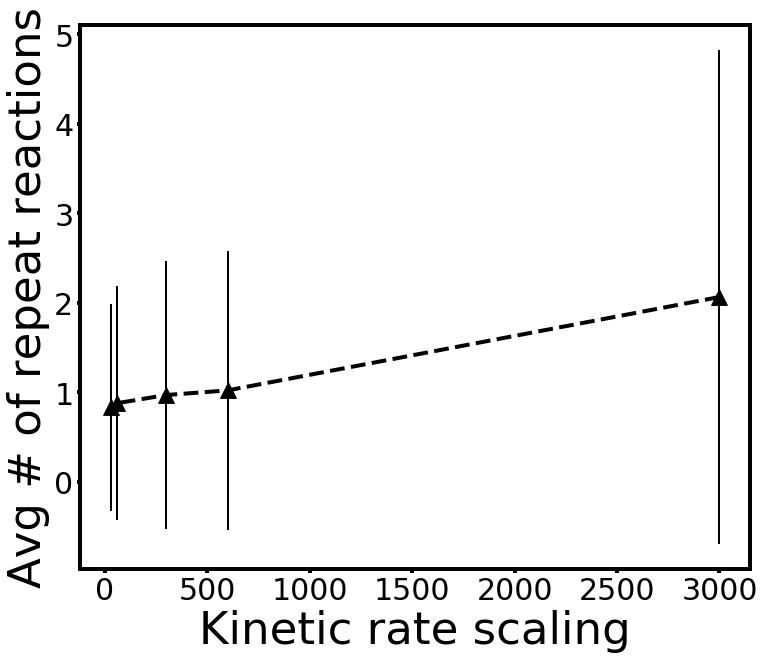

In [100]:
from analysis_utils import *
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib as mpl
import numpy as np
%matplotlib inline
%load_ext autoreload
%autoreload

path = "/Users/Akshay/Documents/TranslationDynamics/data/"
reprxn = list()
data = "190916_1101/"
sim_i = countIncorrectRepeatReactions(path+data,6400,19,0,599)
reprxn.append(sim_i)

data = "190917_0105/"
sim_i = countIncorrectRepeatReactions(path+data,6400,19,0,599)
reprxn.append(sim_i)

data = "190918_1046/"
sim_i = countIncorrectRepeatReactions(path+data,6400,19,0,599)
reprxn.append(sim_i)

data = "190921_2357/"
sim_i = countIncorrectRepeatReactions(path+data,6400,19,0,599)
reprxn.append(sim_i)

data = "190921_2258/"
sim_i = countIncorrectRepeatReactions(path+data,6400,19,0,599)
reprxn.append(sim_i)

fig, ax = plt.subplots(1,1,figsize=(12,10))
x=[3000,600,300,60,30]
ax.scatter(x,[rep[0] for rep in reprxn],zorder=2,s=250,marker='^',color='black')
ax.errorbar(x,[rep[0] for rep in reprxn],[rep[1] for rep in reprxn],zorder=1,linewidth=4,elinewidth=2,linestyle='dashed',color='black')

ax.tick_params(axis='both', which='major',width=4, labelsize=30)
ax.spines['left'].set_linewidth(4)
ax.spines['bottom'].set_linewidth(4)
ax.spines['top'].set_linewidth(4)
ax.spines['right'].set_linewidth(4)
ax.set_xlabel('Kinetic rate scaling',size=45,color='black')
ax.set_ylabel('Avg # of repeat reactions',size=45,color='black')


In [54]:
from analysis_utils import *
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib as mpl
import numpy as np
%matplotlib inline
%load_ext autoreload
%autoreload

path = "/Users/Akshay/Documents/TranslationDynamics/data/"

data = "191003_2140/"
sim_i = countIncorrectRepeatReactions(path+data,6400,19,500,599)
print(sim_i)


data = "191008_0117/"
sim_i = countIncorrectRepeatReactions(path+data,6400,19,500,599)
print(sim_i)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
test
[27, 1, 0, 2, 6, 2, 0, 1, 15, 15, 0, 1, 0, 1, 1, 0, 4, 1, 3, 1, 12, 1, 1, 1, 5, 14, 0, 0, 0, 0, 4, 2, 35, 2, 6, 0, 3, 0, 0, 0, 7, 0, 1, 4, 0, 0, 1, 0, 0, 6, 0, 0, 0, 0, 0, 2, 0, 14, 0, 3, 9, 6, 27, 7, 6, 7, 0, 0, 2, 1, 0, 0, 0, 0, 0, 2, 13, 12, 0, 0, 6, 0, 1, 0, 2, 8, 0, 11, 3, 12, 2, 3, 1, 2, 6, 7, 16, 1, 14, 3, 9, 4, 4, 8, 4, 5, 2, 1, 5, 0, 0, 0, 3, 0, 2, 1, 2, 0, 1, 0, 6, 0, 0, 7, 0, 7, 14, 7, 1, 4, 2, 0, 3, 0, 0, 27, 7, 6, 3, 10, 9, 2, 2, 2, 0, 0, 1, 0, 0, 1, 0, 0, 0, 14, 1, 4, 9, 7, 0, 5, 0, 1, 0, 0, 0, 1, 1, 0, 3, 0, 0, 1, 2, 4, 14, 2, 5, 0, 5, 7, 5, 0, 3, 1, 9, 2, 3, 1, 0, 0, 1, 1, 2, 0, 0, 5, 0, 1, 0, 0, 0, 0, 3, 5, 0, 3, 2, 2, 4, 1, 1, 0, 6, 2, 4, 0, 1, 0, 2, 2, 7, 0, 0, 0, 0, 6, 11, 6, 3, 2, 12, 26, 0, 3, 2, 0, 0, 0, 2, 1, 13, 6, 0, 0, 2, 4, 2, 0, 0, 0, 10, 3, 13, 13, 1, 4, 15, 2, 0, 0, 4, 0, 9, 12, 10, 1, 1, 4, 0, 23, 0, 6, 0, 30, 2, 1, 11, 2, 0, 0, 1, 0, 0, 3, 0, 0, 0, 3, 0, 11, 4, 

In [66]:
from analysis_utils import *
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib as mpl
import numpy as np
%matplotlib inline
%load_ext autoreload
%autoreload

path = "/Users/Akshay/Documents/TranslationDynamics/data/"

data = "191007_1529/"
sim_i = countIncorrectRepeatReactions(path+data,6400,19,0,599)
print(sim_i)


data = "191007_1601/"
sim_i = countIncorrectRepeatReactions(path+data,6400,19,0,599)
print(sim_i)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
test
(0.6461138672336404, 1.0701674376938457)
test
missing expt
85
missing expt
132
missing expt
276
missing expt
390
(0.5806032241289651, 0.9766532312937757)


In [1]:
from analysis_utils import *
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib as mpl
import numpy as np
%matplotlib inline
%load_ext autoreload
%autoreload

path = "/Users/Akshay/Documents/TranslationDynamics/data/"

crowder = list()
nocrowder = list()


data = "191003_2140/"
sim_i = countIncorrectRepeatReactions(path+data,6400,19,0,599)
print(sim_i)
crowder.append(sim_i[0])

data = "191004_0018/"
sim_i = countIncorrectRepeatReactions(path+data,6400,19,0,599)
print(sim_i)
crowder.append(sim_i[0])

data = "191004_0104/"
sim_i = countIncorrectRepeatReactions(path+data,6400,19,0,599)
print(sim_i)
crowder.append(sim_i[0])

data = "191004_1129/"
sim_i = countIncorrectRepeatReactions(path+data,6400,19,0,599)
print(sim_i)
crowder.append(sim_i[0])

data = "191004_1217/"
sim_i = countIncorrectRepeatReactions(path+data,6400,19,0,599)
print(sim_i)
crowder.append(sim_i[0])


data = "191003_2210/"
sim_i = countIncorrectRepeatReactions(path+data,6400,19,0,599)
print(sim_i)
crowder.append(sim_i[0])

###No crowder.

data = "191009_1223/"
sim_i = countIncorrectRepeatReactions(path+data,6400,19,0,599)
print(sim_i)
nocrowder.append(sim_i[0])

data = "191009_1256/"
sim_i = countIncorrectRepeatReactions(path+data,6400,19,0,599)
print(sim_i)
nocrowder.append(sim_i[0])


data = "191009_1333/"
sim_i = countIncorrectRepeatReactions(path+data,6400,19,0,599)
print(sim_i)
nocrowder.append(sim_i[0])

data = "191009_1410/"
sim_i = countIncorrectRepeatReactions(path+data,6400,19,0,599)
print(sim_i)
nocrowder.append(sim_i[0])

data = "191009_1447/"
sim_i = countIncorrectRepeatReactions(path+data,6400,19,0,599)
print(sim_i)
nocrowder.append(sim_i[0])

data = "191007_1601/"
sim_i = countIncorrectRepeatReactions(path+data,6400,19,0,599)
print(sim_i)
nocrowder.append(sim_i[0])


missing expt
26
missing expt
89
missing expt
107
(4.9399082568807335, 7.2499012325335475)
(2.1987801842170773, 3.8357416001118536)
(1.6757985544415948, 2.7901960848850673)
(1.3530652418447695, 2.167106754213426)
missing expt
202
missing expt
462
(1.191013155646677, 1.8060989415414406)
(1.081207011315731, 1.6516108974078334)
missing expt
147
(3.3136942675159236, 4.37746634684726)
missing expt
349
missing expt
587
(1.5402279861225838, 2.386129811538307)
missing expt
427
(1.1036858974358974, 1.7130679492581362)
missing expt
65
missing expt
114
(0.7843935538592027, 1.2628282679875111)
missing expt
90
(0.6340543758682278, 1.0655436473266633)
missing expt
85
missing expt
132
missing expt
276
missing expt
390
(0.5806032241289651, 0.9766532312937757)


[4.93906321 2.19878018 1.67579855 1.35306524 1.19101316 1.08120701] [3.31369427 1.54022799 1.1036859  0.78439355 0.63405438 0.58060322]
[1.62536894 0.6585522  0.57211266 0.56867169 0.55695878 0.50060379]
[1.49050057 1.427568   1.51836547 1.72498261 1.87840854 1.86221324]


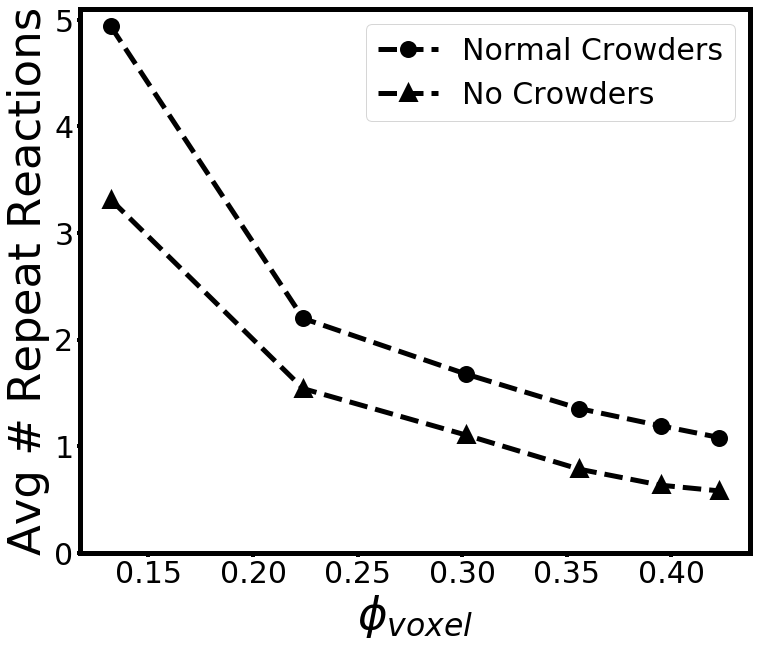

In [6]:
fig, ax = plt.subplots(1,1,figsize=(12,10))

phi_list = [0.132,0.224,0.302,0.356,0.395,0.423]

ax.plot(phi_list,np.array(crowder),marker='o',markersize=12,markeredgewidth=5,linewidth=5,color='black',linestyle='dashed',label='Normal Crowders')
ax.plot(phi_list,np.array(nocrowder),marker='^',markersize=12,markeredgewidth=5,linewidth=5,color='black',linestyle='dashed',label='No Crowders')

ax.tick_params(axis='both', which='major',width=4, labelsize=30)
#ax.set_xlim(0.09,0.51)
ax.set_ylim(0,5.1)
ax.spines['left'].set_linewidth(5)
ax.spines['bottom'].set_linewidth(5)
ax.spines['top'].set_linewidth(5)
ax.spines['right'].set_linewidth(5)

ax.legend()
ax.legend( prop={'size': 30})
ax.set_xlabel('$\phi_{voxel}$',size=45,color='black')
ax.set_ylabel('Avg # Repeat Reactions',size=45,color='black')
print(np.array(crowder),np.array(nocrowder))
print(np.array(crowder)-np.array(nocrowder))
print(np.array(crowder)/np.array(nocrowder))



In [11]:
print(2.19878018/4.93906321,1.67579855/2.19878018,1.35306524/1.67579855,1.19101316/1.35306524, 1.08120701/1.19101316)
print( 241.42409855440323/249.89188510832554, 187/241.42409855440323,148/187,139/148,119/139)

0.44518162382457144 0.7621491976519454 0.8074152110944361 0.8802333581490868 0.9078044192223703
0.9661141995457291 0.7745705632524537 0.7914438502673797 0.9391891891891891 0.8561151079136691


In [108]:
from analysis_utils import *
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib as mpl
import numpy as np
%matplotlib inline
%load_ext autoreload
%autoreload

path = "/Users/Akshay/Documents/TranslationDynamics/data/"

data = "191003_2210/"
sim_i = countIncorrectRepeatReactions(path+data,6400,19,0,599)
print(sim_i)

data = "191001_0409/"
sim_i = countIncorrectRepeatReactions(path+data,6400,19,0,599)
print(sim_i)

data = "191001_0339/"
sim_i = countIncorrectRepeatReactions(path+data,6400,19,0,599)
print(sim_i)


data = "190917_0105/"
sim_i = countIncorrectRepeatReactions(path+data,6400,19,0,599)
print(sim_i)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
test
(1.081207011315731, 1.6516108974078334)
test
(1.122689075630252, 1.6810722213188884)
test
(1.0125980508676016, 1.5022629553439757)
test
(1.0227784730913643, 1.5573257106168756)


In [25]:

from analysis_utils import *
%load_ext autoreload
%autoreload

data = "191003_2140/"
sim_i = countIncorrectRepeatReactions(path+data,6400,19,3,4)
print(sim_i)
crowder.append(sim_i[0])

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
test
             time    rxn          x          y          z  reactantA  \
80     335.812400  rxn22  16.443137  10.345364   7.529795       46.3   
86     342.169200  rxn22  16.344571  11.341009   6.797439       46.3   
90     354.442000  rxn22  17.086727  11.509045   6.518467       46.3   
94     356.989300  rxn22  17.015443  11.786221   6.368193       46.3   
96     363.141700  rxn22  16.854827  10.877928   3.863791       46.3   
98     370.255500  rxn22   0.725406  11.123568   5.187271       46.3   
106    406.442600  rxn22   2.971449  12.338569   4.678012       46.3   
114    428.686200  rxn22   4.356964  12.602500   4.145390       46.3   
116    433.748600  rxn22   5.792682  12.594147   5.188141       46.3   
120    439.303600  rxn22   4.576636  11.894260   4.267218       46.3   
124    444.815400  rxn22   5.440158  11.189348   4.753968       46.3   
126    444.853400  rxn22   5.356232  11.079

[autoreload of analysis_utils failed: Traceback (most recent call last):
  File "/Users/Akshay/anaconda3/lib/python3.6/site-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/Users/Akshay/anaconda3/lib/python3.6/site-packages/IPython/extensions/autoreload.py", line 450, in superreload
    update_generic(old_obj, new_obj)
  File "/Users/Akshay/anaconda3/lib/python3.6/site-packages/IPython/extensions/autoreload.py", line 387, in update_generic
    update(a, b)
  File "/Users/Akshay/anaconda3/lib/python3.6/site-packages/IPython/extensions/autoreload.py", line 357, in update_class
    update_instances(old, new)
  File "/Users/Akshay/anaconda3/lib/python3.6/site-packages/IPython/extensions/autoreload.py", line 280, in update_instances
    frame = next(frame_nfo.frame for frame_nfo in inspect.stack()
StopIteration
]
